In [1]:
import sys
sys.path.insert(0, "/home/pidoux/MASTER/ML/projet/Projet/Module")

from Loss import *
from Linear import *
from Activation import *
from Sequential import *
from mltools import *

import matplotlib.pyplot as plt
import random
import numpy as np
from tqdm import tqdm

In [13]:
# générer les données
X_train, y_train = gen_arti(centerx=1, centery=1, sigma=0.1, nbex=1000, data_type=1, epsilon=0.1)
X_test, y_test = gen_arti(centerx=1, centery=1, sigma=0.1, nbex=1000, data_type=1, epsilon=0.1)
y_train = np.where(y_train==-1,0,1).reshape((-1,1))
y_test = np.where(y_test==-1,0,1).reshape((-1,1))

# paramétrer le modèle
d = X_train.shape[1]
d_prime = 20
out = 1
epoch = 1000
gradient_step = 1e-2
batchsize=200
loss_mse = MSELoss()  
lin = Linear(d, d_prime)
lin2 = Linear(d_prime, out)
sig = Sigmoide()
tan = TanH()

# créer le modèle
net = Sequential([lin,tan,lin2,sig])
opt = Optim(net,loss_mse,eps=gradient_step)
L = opt.SGD(X_train,y_train,batchsize,epoch)

100%|██████████| 1000/1000 [00:04<00:00, 203.26it/s]


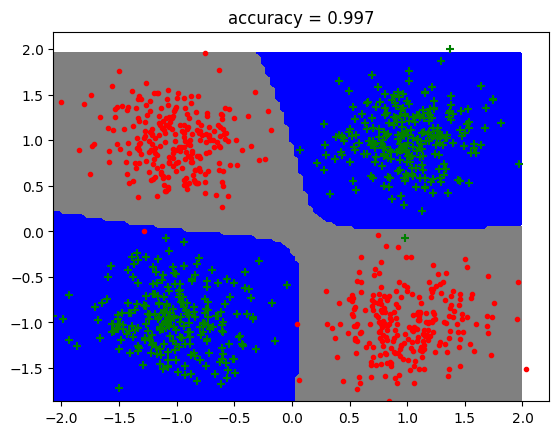

In [14]:

def predict(X_test):
    out = np.array(opt._net.forward(X_test)[-1])
    res = np.where(out >= 0.5,1 ,0 )
    return res

def accuracy(X_test,y_test):
    out = np.array(opt._net.forward(X_test)[-1])
    res = np.where(out >= 0.5,1 ,0 )
    acc = np.sum(res == y_test)/len(y_test)
    return acc

acc = accuracy(X_test,y_test)
plt.figure()
plot_frontiere(X_test, predict, step=100)
plot_data(X_test, y_test.reshape(-1))
plt.title("accuracy = "+str(acc))
plt.show()


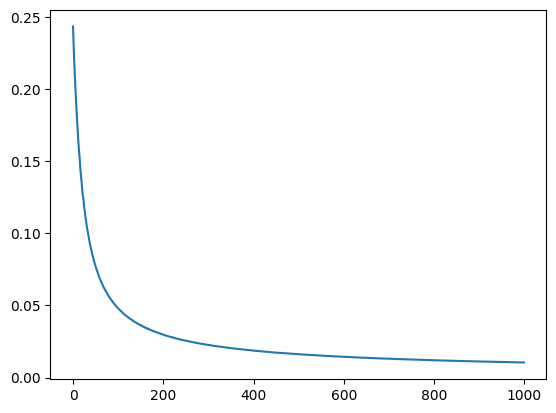

In [15]:
plt.plot(L)